# Post-processing

In [1]:
%matplotlib inline

In [51]:
import string
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import softmax

In [6]:
train = pd.read_csv("../input/train.csv")

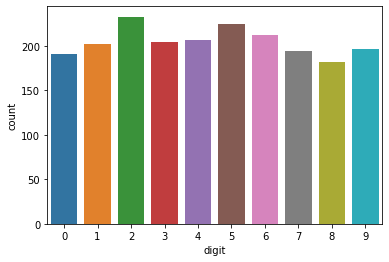

In [7]:
sns.countplot(train.digit);

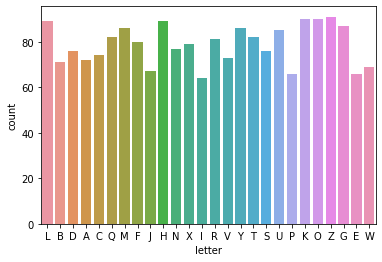

In [8]:
sns.countplot(train.letter);

In [18]:
tab = pd.crosstab(train.digit, train.letter, normalize="columns")
tab

letter,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
digit,,,,,,,,,,,,,,,,,,,,,
0,0.069444,0.070423,0.162162,0.078947,0.060606,0.0500,0.126437,0.112360,0.109375,0.044776,...,0.085366,0.061728,0.092105,0.097561,0.082353,0.054795,0.101449,0.088608,0.116279,0.131868
1,0.041667,0.028169,0.202703,0.131579,0.090909,0.1625,0.057471,0.067416,0.078125,0.119403,...,0.134146,0.123457,0.157895,0.060976,0.070588,0.082192,0.086957,0.101266,0.023256,0.109890
2,0.125000,0.112676,0.054054,0.157895,0.136364,0.0875,0.103448,0.179775,0.078125,0.119403,...,0.158537,0.049383,0.092105,0.060976,0.129412,0.150685,0.159420,0.126582,0.139535,0.076923
3,0.013889,0.098592,0.081081,0.197368,0.106061,0.1000,0.080460,0.112360,0.125000,0.223881,...,0.085366,0.123457,0.118421,0.060976,0.070588,0.082192,0.043478,0.088608,0.116279,0.109890
4,0.097222,0.183099,0.067568,0.052632,0.166667,0.1000,0.126437,0.056180,0.078125,0.119403,...,0.085366,0.086420,0.131579,0.060976,0.129412,0.109589,0.130435,0.063291,0.069767,0.087912
5,0.069444,0.056338,0.094595,0.092105,0.121212,0.0750,0.137931,0.134831,0.062500,0.134328,...,0.121951,0.123457,0.105263,0.109756,0.176471,0.123288,0.130435,0.151899,0.151163,0.175824
6,0.111111,0.169014,0.081081,0.092105,0.121212,0.1625,0.137931,0.078652,0.125000,0.074627,...,0.073171,0.111111,0.078947,0.182927,0.082353,0.068493,0.101449,0.063291,0.127907,0.098901
7,0.152778,0.098592,0.081081,0.065789,0.030303,0.0875,0.080460,0.078652,0.156250,0.044776,...,0.073171,0.172840,0.078947,0.060976,0.023529,0.136986,0.101449,0.088608,0.081395,0.120879
8,0.111111,0.098592,0.067568,0.065789,0.045455,0.0500,0.091954,0.089888,0.125000,0.074627,...,0.085366,0.074074,0.105263,0.146341,0.070588,0.082192,0.072464,0.113924,0.127907,0.032967


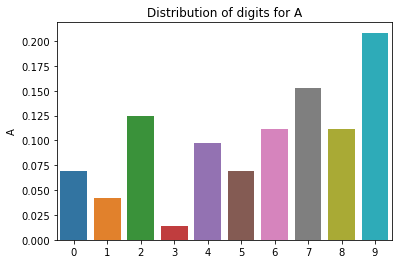

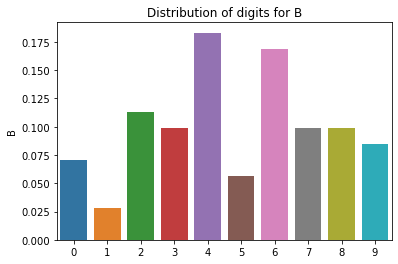

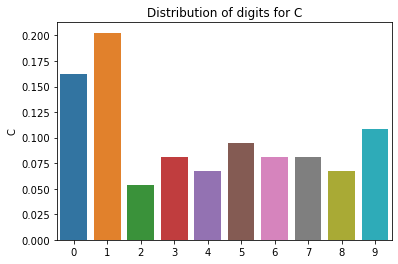

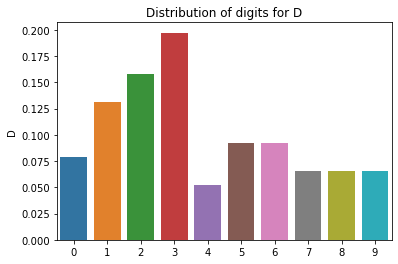

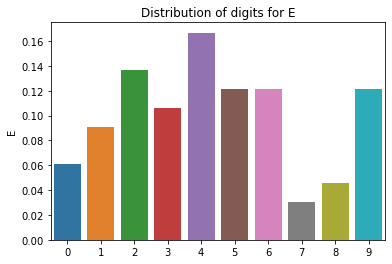

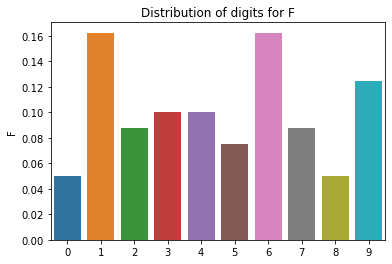

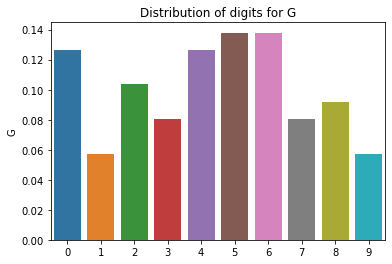

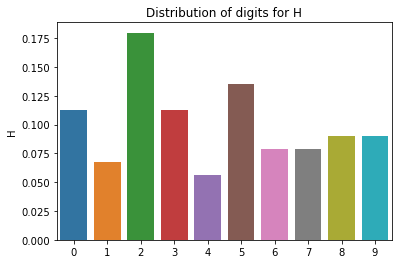

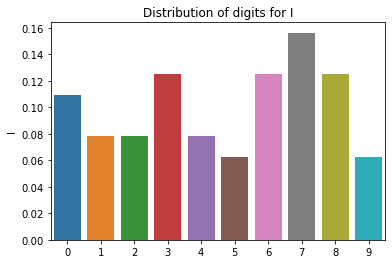

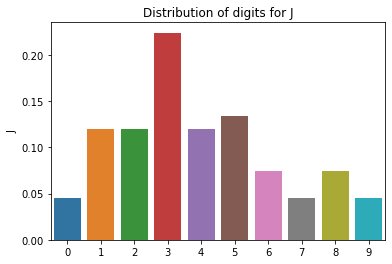

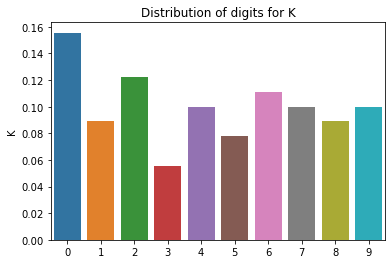

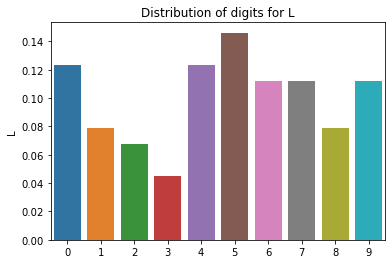

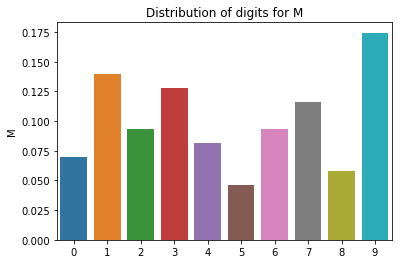

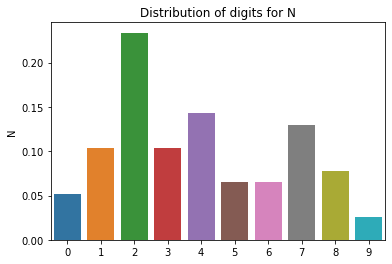

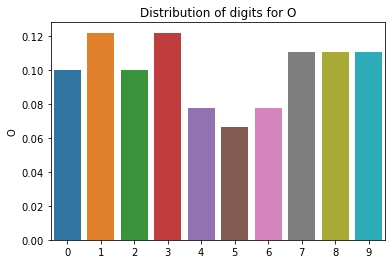

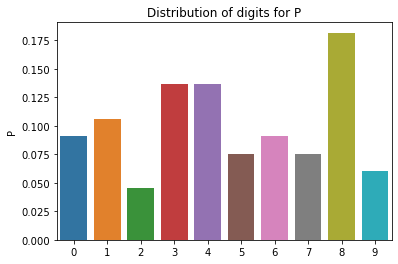

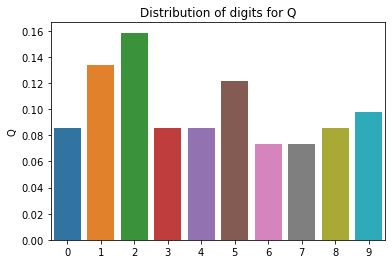

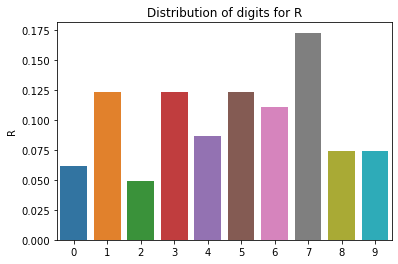

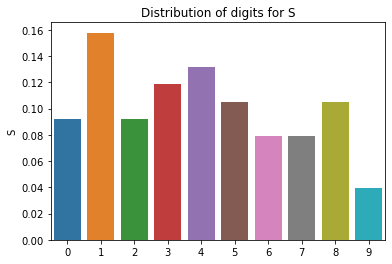

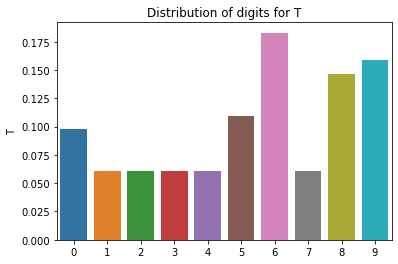

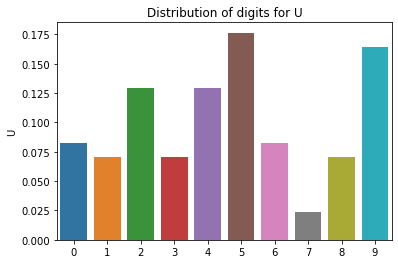

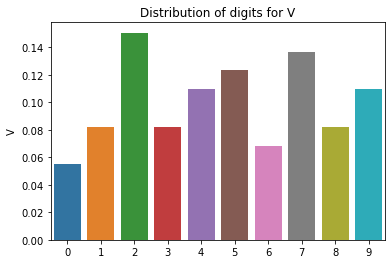

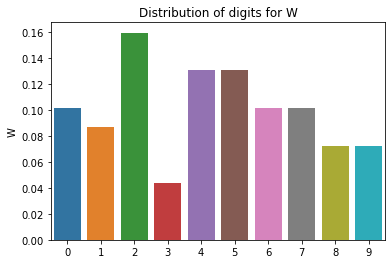

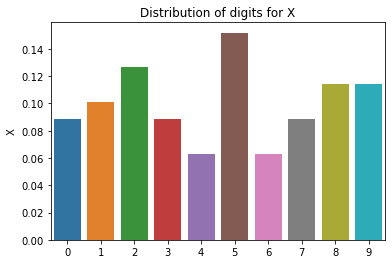

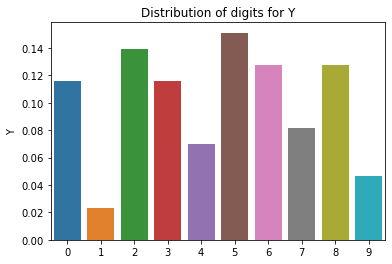

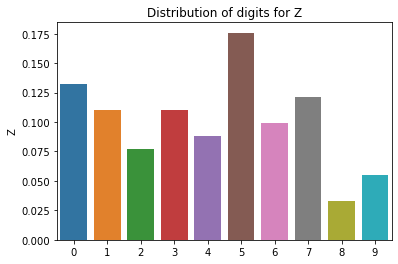

In [28]:
for letter in string.ascii_uppercase:
    sns.barplot(np.arange(10), tab[letter])
    plt.title(f"Distribution of digits for {letter}")
    plt.show()

In [53]:
dists = {}
for letter in string.ascii_uppercase:
    dists[letter] = tab[letter].values
joblib.dump(dists, "../input/letter-to-digit-distribution.pkl")

['../input/letter-to-digit-distribution.pkl']

In [31]:
df_test = pd.read_csv("../input/test.csv")
df_test.head()

,id,letter,0,1,2,3,4,5,6,7,...,774,775,776,777,778,779,780,781,782,783
0,2049,L,0,4,0,2,4,2,3,1,...,2,0,4,2,2,4,3,4,1,4
1,2050,C,4,1,4,0,1,1,0,2,...,0,3,2,4,2,4,2,2,1,2
2,2051,S,0,4,0,1,3,2,3,0,...,1,3,2,0,3,2,3,0,1,4
3,2052,K,2,1,3,3,3,4,3,0,...,3,0,3,2,4,1,0,4,4,4
4,2053,W,1,0,1,1,2,2,1,4,...,4,3,1,4,0,2,1,2,3,4


In [65]:
preds = np.load(f"../output/test-preds-resnet50-sgd-350eps-pl-swa.npy")

In [66]:
preds = softmax(preds, axis=1)

In [67]:
preds_pp = np.zeros((len(df_test), 10))
for i in range(len(df_test)):
    letter = df_test.letter[i]
    preds_pp[i] = preds[i] * dists[letter]

In [68]:
predsb_pp = np.argmax(preds_pp, axis=1)
predsb = np.argmax(preds, axis=1)

In [69]:
predsb[:10]

array([6, 9, 8, 0, 3, 7, 5, 3, 4, 4])

In [70]:
predsb_pp[:10]

array([6, 9, 8, 0, 3, 7, 5, 3, 4, 4])